## Introduction 
The Data set I analyzed is **Titanic Data**.  
At first we need understand data, then ask question.  
From kaggle, we can find the descriptions of this csv file.  
These are definitions of variables.

    VARIABLE DESCRIPTIONS:
    survival        Survival
                    (0 = No; 1 = Yes)
    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)


## Ask Question
Then we can ask questions.  
As kaggle suggested some groups of people more likely to survive, like **children, women, and the upper-class.**  
So I will ask, **Is these factors really relate to the survive rate?**  
**Add: Do different Sex in same class have different survive rate ?** 
**Or same Sex have different survive rate in different class?**

And more, when I seach the structure and cabins' location of titanic online,  
I find the factor of cabin may also connect to the survive rate,  
such as some cabins is far from boat deck,and living with crowd of people.  
Therefore, I will ask, ~~**Will people living in different cabin have different survive rate?**~~  
**Revise: What is connection between fare and survive rate?**

Let's wrangle data.

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

# Get a glimpse of data
titanic_df = pd.read_csv('./titanic_data.csv')
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
# Check the information of our data
titanic_df.info()

# Check Cabin column
# print titanic_df['Cabin'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


## Revision Question
As we see, unfortunately, there are too few data about the cabins.  
And some of them even have several cabins' name in it.
We need change question, or consider a way to solve it.  

At first, I try to solve it.  
As different class people will live in the different area and different room. Like [there](http://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/) said.  
And for different class, the ticket price is also [differernt](http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/), like 3-8 pounds for 3rd class and 12 pounds for 2nd class.  
So, I come up with an idea. Can we guess their room from their ticket price?  
However, when search information about coordinate room for different classes,  
I find in some floor's room, like D, E, and F floor, is hard to determine which class lives here.  
But for 1st class, they mainly live from A to E, 2nd class D to F, and 3rd class F to G.

Therefore, people with different fare will live in different area.  
I change my Question to **What is connection between fare and survive rate?**



In [234]:
# At first drop data it seems useless for this analysis
# they are ID, name, ticket number, embark place, cabin, SibSp, and Parch
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Embarked','Cabin','SibSp','Parch'],axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [235]:
# At first let's analyse from sex and age view
# Divide children from male and female type
titanic_df.loc[titanic_df['Age'] <= 16, 'Sex'] = 'child'
titanic_df = titanic_df.drop(['Age'],axis=1)
titanic_df.head()


,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500


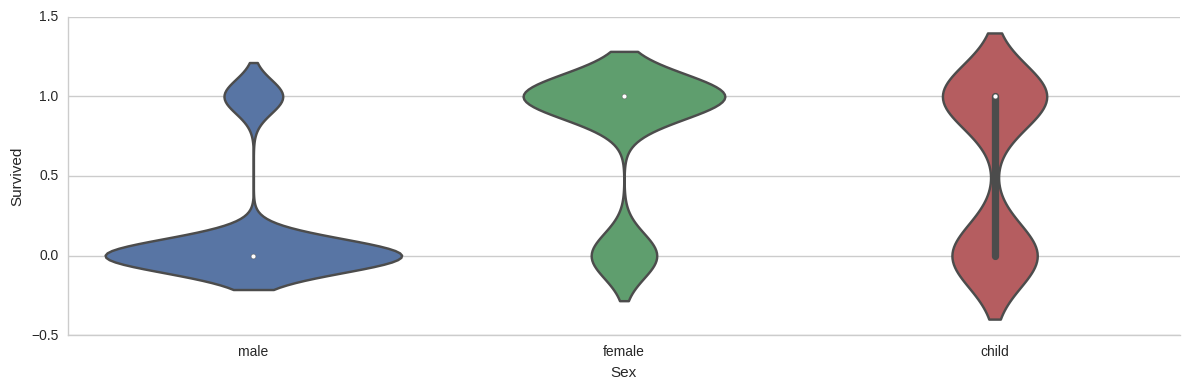

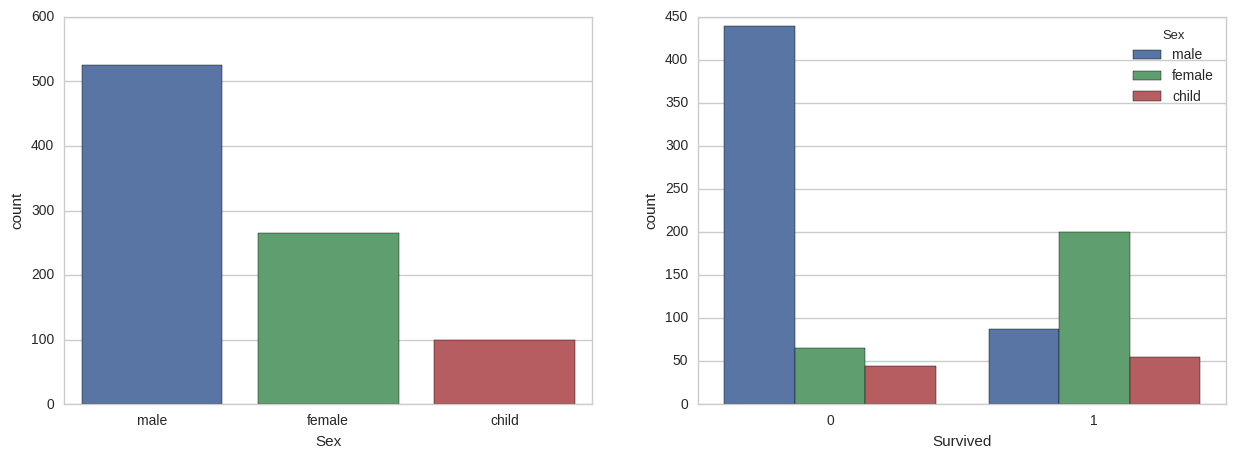

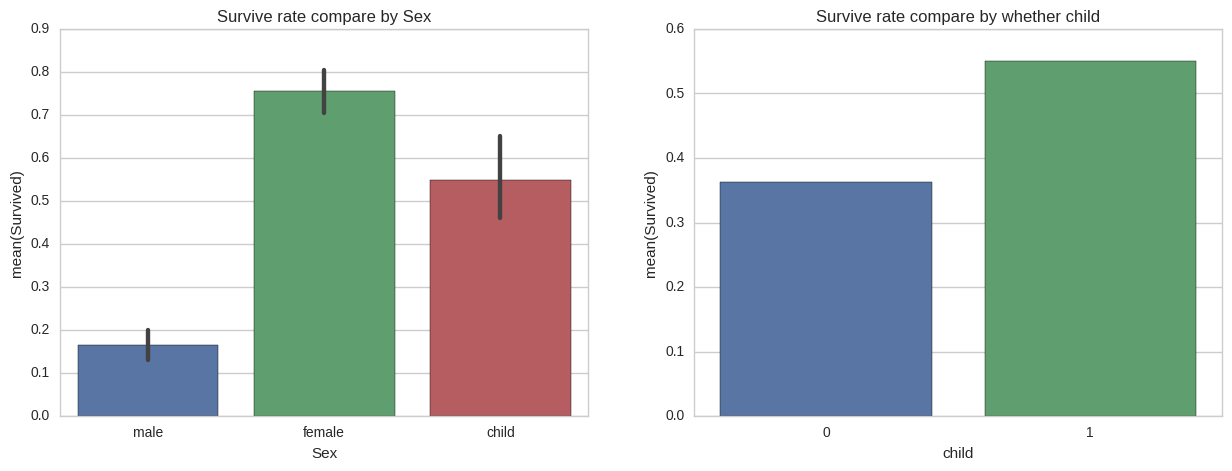

In [262]:
# Draw pictures to see more clearly of the relations
# about sex and age factor

sns.factorplot(data=titanic_df,x='Sex',y='Survived',kind="violin",size=4,aspect=3)

# Plot basic information about sex and age
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=titanic_df, x='Sex',ax=axis1)
sns.countplot(data=titanic_df,x='Survived',hue='Sex',order=[0,1],ax=axis2)


fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))
# Group data by sex and whether child
sex_survi_groups = titanic_df[['Sex','Survived']].groupby(['Sex'],as_index=True)

#Divide into three groups
men_group = sex_survi_groups.get_group('male')
women_group = sex_survi_groups.get_group('female')
children_group = sex_survi_groups.get_group('child')

# Plot survive rate between different sex
men_women_group = pd.concat([men_group,women_group])

# sns.barplot(data=men_women_group,x='Sex',y='Survived',order=['male','female'],ax=axis3)
sns.barplot(data=titanic_df[['Sex','Survived']],x='Sex',y='Survived',order=['male','female','child'],ax=axis3)

# Child and not child
child_dummy = pd.get_dummies(titanic_df['Sex'])
child_dummy.drop(['male','female'],axis=1,inplace=True)
child_dummy['Survived'] = titanic_df['Survived']
child_groups = child_dummy.groupby(['child'],as_index=False)
child_group_perc = child_groups.mean()
sns.barplot(data=child_group_perc,x='child',y='Survived',order=[0,1],ax=axis4)


axis3.set_title('Survive rate compare by Sex')
axis4.set_title('Survive rate compare by whether child')

In [237]:
# Statistic Hypothesis Test
# T-test for men and women
# H0: Men and women have same survive rate, mean(men)=mean(women)
from scipy.stats import ttest_ind

ttest_ind(men_group['Survived'],women_group['Survived'])

Ttest_indResult(statistic=-19.921838592527482, pvalue=7.5461289072111466e-72)

In [238]:
# T-test for child and non-child
# H0: Children and non-child have same survive rate, mean(child)=mean(non-child)
ttest_ind(child_groups.get_group(0)['Survived'],child_groups.get_group(1)['Survived'])

Ttest_indResult(statistic=-3.6492235959618395, pvalue=0.00027836211442544437)

## Analyze above test about Sex and Children
We can see that for men and women t-statistical is a large negative number, and p value is very small, even far small than 0.01.  
Therefore we can confidently reject our null hypothesis to say **women have much higher survive rate than man.**  

For child and non-child, even it is not significant than sex.  
We can still say we have 99% confident say **children have higher survive rate than adults**, as small pvalue.


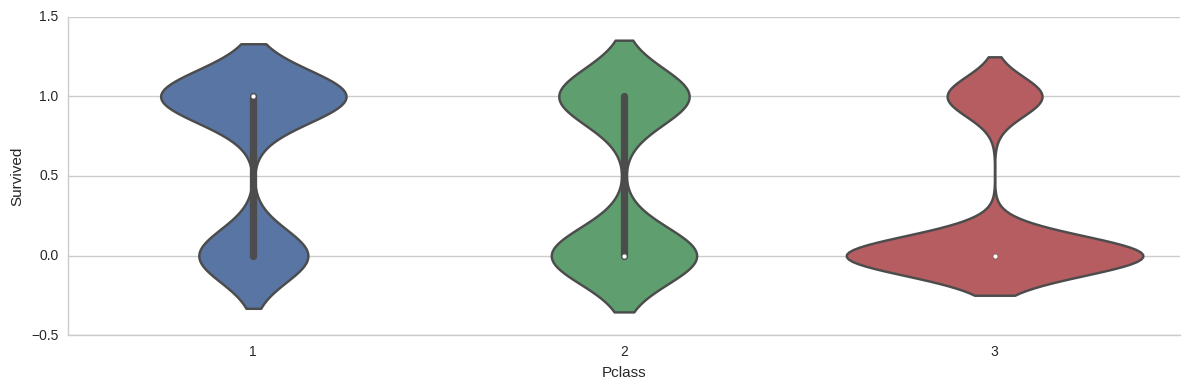

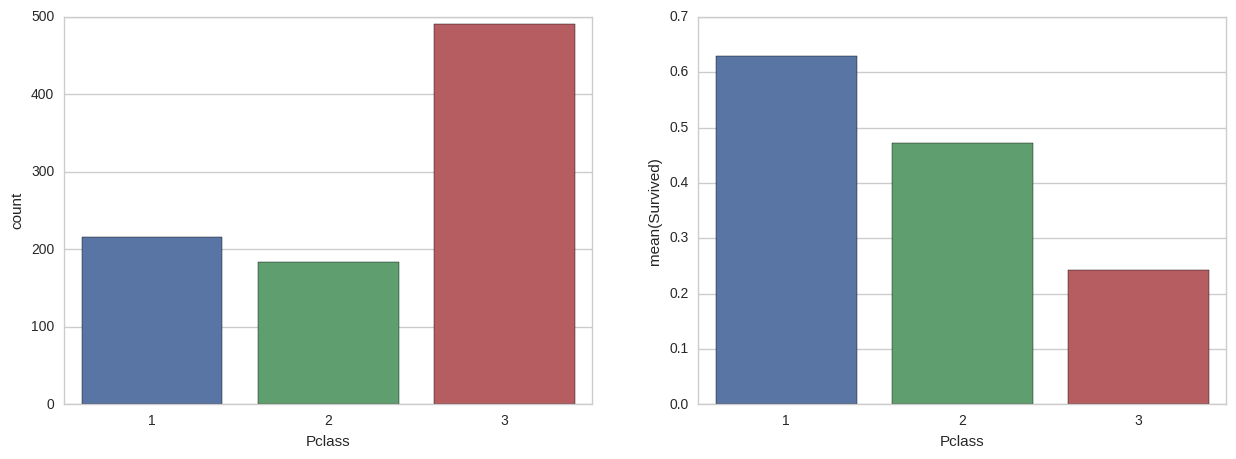

In [239]:
# Then let's analyze class factor


sns.factorplot(data=titanic_df,x='Pclass',y='Survived',kind="violin",size=4,aspect=3)

# Group by class
class_survi_prec = titanic_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

# Compare number and survived rate between three classes
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=titanic_df, x='Pclass',ax=axis1)
sns.barplot(data=class_survi_prec,x='Pclass',y='Survived',order=[1,2,3],ax=axis2)

In [240]:
# Statistic Hypothesis Test: as there are three classes, we use ANOVA
# H0:Three classes have same survive rate mean(class1)=mean(class2)=mean(class3)
from scipy.stats import f_oneway

class1_group = titanic_df[['Pclass','Survived']][titanic_df["Pclass"]==1]
class2_group = titanic_df[['Pclass','Survived']][titanic_df["Pclass"]==2]
class3_group = titanic_df[['Pclass','Survived']][titanic_df["Pclass"]==3]

f_oneway(class1_group['Survived'],class2_group['Survived'],class3_group['Survived'])


F_onewayResult(statistic=57.964817590910101, pvalue=2.1832474151174347e-24)

In [241]:
# T-test between class 1 and class 2
# H0: mean(class1)=mean(class2)
ttest_ind(class1_group['Survived'],class2_group['Survived'])

Ttest_indResult(statistic=3.1786140523324851, pvalue=0.0015954656668372635)

In [242]:
# T-test between class 2 and class 3
# H0: mean(class2)=mean(class3)
ttest_ind(class2_group['Survived'],class3_group['Survived'])

Ttest_indResult(statistic=5.9306379718227102, pvalue=4.8247994951465616e-09)

In [243]:
# T-test between class 1 and class 3
# H0: mean(class1)=mean(class3)
ttest_ind(class1_group['Survived'],class3_group['Survived'])

Ttest_indResult(statistic=10.623796623966948, pvalue=1.480395911990978e-24)

## Analyze above test about Pclass
At first we can see from graphs that there are actually some difference between three classes.  
1st class have highest survive rates, 2nd class follow, and then 3rd class.  
Especially, 3rd class is very different from the upper two classes.  
**3rd class has much lower survive rate than other classes.**  

To confirm this observation, we carry on some tests.  
At first carry on ANOVA on these three classes, we have a very high F-statistic and a very low p-value.  
So we can confidently reject its H0, and say **Pclass actually relate to survive rates**.  

But, how difference between each groups?  
I use three T-test to test them. I find Class 1 and Class 2 people actually have different survive rate. 
However, when compare to difference between class3 and them, its reletively small.  

We can conclude that **class actually affect survive rate, particularly between upper two classes and Class 3.**

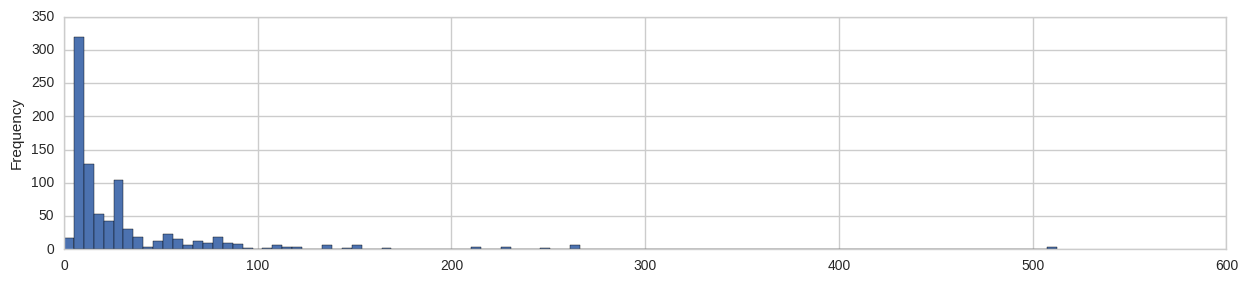

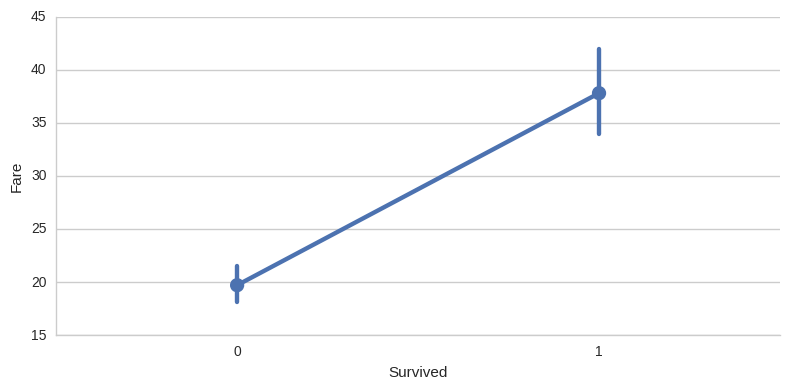

In [259]:
# Last let's analyze fare factor
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100)

# We clear out people have very high fare
normal_people = titanic_df[['Fare','Survived']][titanic_df['Fare']<200]
fare_survi_group = normal_people[['Fare','Survived']].groupby(['Survived'],as_index=False)

fare_survi_perc = fare_survi_group.mean()
figure(2)
# sns.barplot(data=fare_survi_perc,x='Survived',y='Fare',order=[0,1])
sns.factorplot(data=normal_people,x='Survived',y='Fare',aspect=2)

In [172]:
# Statitic Test
# H0: People survived and not survived have same fare, mean(survive_fare)=mean(non_survive_fare)

ttest_ind(fare_survi_group.get_group(0)['Fare'],fare_survi_group.get_group(1)['Fare'])

Ttest_indResult(statistic=-9.2255699754985034, pvalue=2.0917174696709924e-19)

## Analyze about fare
At first, we can find there are some people with very high fare, and we clear them out for a fair analysis.  
Then from bar chart, we can find people survived have higher mean fare than people not survived.  

We can do t-test to confirm this.  
From T-test, p value is so small that we can confidently say people survied and not survied have different fare.  
And more, **people survived have higher fare than people not survived.**

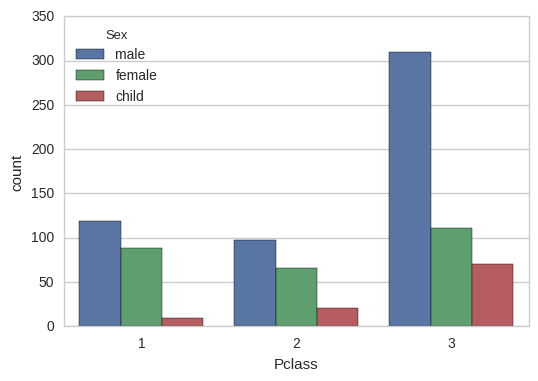

In [244]:
# To explore more details
# let's see sex distrubution in different classes

sns.countplot(data=titanic_df,x='Pclass',hue='Sex',order=[1,2,3])

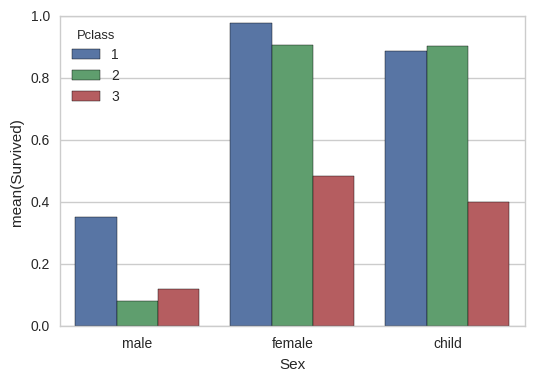

In [245]:
# From above we could see class 3 have large percent of men
# So we can guess the low survived rate of men is caused by class3 men
# the survive rate in higher class between sex may not very distinct

# Draw chart of different classes's survive rate detail
class_sex_group = titanic_df[['Sex','Pclass','Survived']].groupby(['Sex','Pclass'],as_index=False)
class_sex_survive_prec = class_sex_group.mean()

sns.barplot(data=class_sex_survive_prec, x='Sex',y='Survived',hue='Pclass',order=['male','female','child'])

In [246]:
# Between class1 and class2 women they have similar survive rates
# H0 = Survived mean(female_class1)=mean(female_class2)
female_class1 = class_sex_group.get_group(('female',1))
female_class2 = class_sex_group.get_group(('female',2))
ttest_ind(female_class1['Survived'],female_class2['Survived'])


Ttest_indResult(statistic=1.8965349648552485, pvalue=0.059786552384295318)

In [247]:
# Also between class1 and class2 child they have much similar survive rates
# H0 = Survived mean(child_class1)=mean(child_class2)
child_class1 = class_sex_group.get_group(('child',1))
child_class2 = class_sex_group.get_group(('child',2))
ttest_ind(child_class1['Survived'],child_class2['Survived'])


Ttest_indResult(statistic=-0.12833778958395003, pvalue=0.8987990307388144)

In [250]:
# And class2 and class3 male they also have similar survive rate
# H0 =Survived mean(male_class2)=mean(male_class3)
male_class2 = class_sex_group.get_group(('male',2))
male_class3 = class_sex_group.get_group(('male',3))
ttest_ind(male_class2['Survived'],male_class3['Survived'])

Ttest_indResult(statistic=-1.0096659166366515, pvalue=0.31325820755365363)

## Analysis of class and sex detail
From chart, we can see **women is actually have higher survive rate than men, even in different classes.**  
And **1st class have higher survive rate for men, 3rd class children and women have lower survive rate.**  

However, when we test class 1 female and class 2 female, class 1 child and class 2 child, as well as class 2 male and class 3 male,    
we can't reject the hypothesis in high significance.  
So we can conclude even in the whole higher class have higher survive rate,  
**for women and children class 1 and class 2 have no much diffrerence;**  
**for male class 2 and class 3 have no much difference.**

## Summary
### First Question: Sex and Age factors with Survive rate
From this violin chart, we can see clearly the survived distribution of male, female, and child.  
![Figure 1](images/sex_violin.png)
We can see the opposite condition of male and female, most of males died and most of females lived.  
For children, it nearly half and half.  
We can look at more details at bar tables.
![Figure 2](images/male_female_child.png)
It exactly show female have higher survive rate than male and children have higher survive rate than non-children.  

We can also use statistical hypothesis test confirm this.  
We use t-test, and we get **t-statistic=-19.921, pvalue=7.546e-72** for male and female.  
**statistic=-3.649, pvalue=0.00028** for children and non-children.  
These actually reject null hypothesis, and confirm our hypothesis in a high significance.  

### Second Question: Class factor with Survive rate
As above, we show violin plot first.  
We can see most of 1st class survived, most of 3rd class died, and nearly half of 2nd class survived.  
![Figure3](images/class_violin.png)
Then show people number of the three classes and respective survive rate.  
![Figure4](images/class_mean_survi.png)
It seems higher class have higher survive rate, and 3rd class have most of people, but lowest survive rate.  

Using ANOVA analyse three class, and then using T-test for each pair of them.  
It shows **Class actually relate to survive rate, especially between class 3 and upper classes.**

### Third Question: Fare fator with Survive rate
At first, show people distribution of different fares.
![Figure5](images/fare_distr.png)
We can see there are some outliners pay a lot of fare.  
For fair, we clean them out, and plot mean fare for survive and non-survive groups.
![Figure6](images/fare_factor.png)
It shows clearly **people survived with higher fare.**  
T-test also confirm our idea.

### Forth Question: When go to each class and each sex, above conclusions still work?
At first, plot bar chart for each sex and coordinate class.  
Some interesting things emerge out.  
![Figure7](images/sex_class_survi.png)
For male, its no longer higher class with higher survive rate, 
2nd class men even have lower survive rate than 3rd class men.  
For female and child, 1st class and 2nd class seems have similar survive rate.  

To confirm our observation, carry on T-test between 1st and 2nd class female and child, and 2nd and 3rd class men.  
If we hold 99% significance, all the three null hypothesis can't be rejected.  
Therefore, what we conclude above don't work here.

## Conclusion
1. **Women have higher survive rate than men and chidren, no matter whole people or seperate classes.**  
2. **Chidren have higher survive rate than whole adult group.**  
3. **From whole view, higher class has higher survive rate.**  
4. **Survived people have higher price of their fares.**  
5. **If we look at details, some of above conclusions fail.**  
  1. **For 1st and 2nd classes, women and children have similar survive rate.**
  2. **For 2nd and 3rd classes, men have similar survive rate.**

## Reference

1. [Kaggle: Titanic variable descriptions](https://www.kaggle.com/c/titanic/data)
2. [Wikipedia: Titanic sinking details](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic)
3. [The design of Titanic](http://www.ultimatetitanic.com/design/#.WDl3Et8xA8o)
4. [Suites and cabins for passengers on the Titanic](http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/)
5. [Pandas documents](http://pandas.pydata.org/pandas-docs/stable/index.html)
6. [Room allocation in Titanic](http://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/)
7. [Ticket price for different class](http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/)
8. [Advanced Functionality in Seabron](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)
9. [Panda dataframe add colums](http://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas)
10. [Udacity Inferential Statistics](https://classroom.udacity.com/courses/ud201)
11. [Kaggle a journey through titanic notebook](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/notebook)
12. [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
13. [How to deal with SettingWithCopyWarning in Pandas?](http://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)
14. [What statistical analysis should I use?](http://www.ats.ucla.edu/stat/stata/whatstat/whatstat.htm)
15. [Seaborn Documents](http://seaborn.pydata.org/index.html)
16. [Scipy stats](https://docs.scipy.org/doc/scipy/reference/stats.html)